In [1]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 53.9 MB/s 


In [2]:
import pyupbit

In [3]:
#BTC 최근 200시간의 데이터
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df

,open,high,low,close,volume,value
2021-11-29 11:00:00,72581000.0,72881000.0,72482000.0,72500000.0,367.306483,2.671367e+10
2021-11-29 12:00:00,72499000.0,72745000.0,72400000.0,72497000.0,531.713385,3.859440e+10
2021-11-29 13:00:00,72497000.0,72677000.0,72029000.0,72109000.0,272.784650,1.972094e+10
2021-11-29 14:00:00,72109000.0,72211000.0,71857000.0,72128000.0,240.414619,1.732067e+10
2021-11-29 15:00:00,72133000.0,72400000.0,72098000.0,72193000.0,194.399499,1.403889e+10
...,...,...,...,...,...,...
2021-12-07 14:00:00,63040000.0,63320000.0,62970000.0,63052000.0,243.087001,1.534949e+10
2021-12-07 15:00:00,63070000.0,63272000.0,62911000.0,63200000.0,232.923012,1.469602e+10
2021-12-07 16:00:00,63126000.0,63272000.0,62800000.0,62814000.0,254.601537,1.604354e+10
2021-12-07 17:00:00,62820000.0,63313000.0,62800000.0,63306000.0,342.549678,2.159704e+10


In [4]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-11-29 11:00:00,72500000.0
1,2021-11-29 12:00:00,72497000.0
2,2021-11-29 13:00:00,72109000.0
3,2021-11-29 14:00:00,72128000.0
4,2021-11-29 15:00:00,72193000.0
...,...,...
195,2021-12-07 14:00:00,63052000.0
196,2021-12-07 15:00:00,63200000.0
197,2021-12-07 16:00:00,62814000.0
198,2021-12-07 17:00:00,63306000.0


In [5]:
from fbprophet import Prophet

In [16]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [9]:
#24시간 미래예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

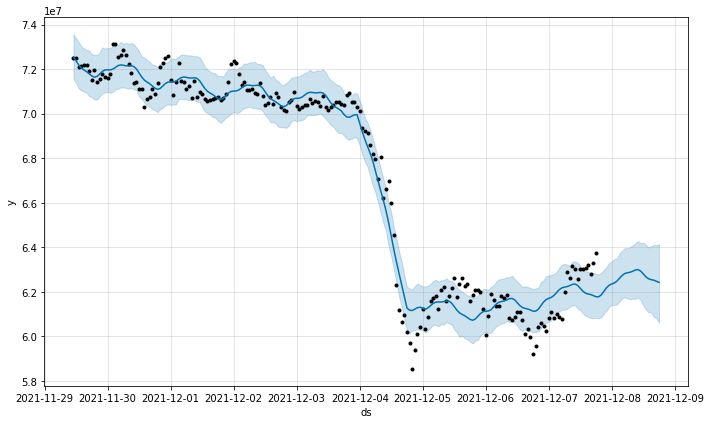

In [10]:
fig1 = model.plot(forecast)

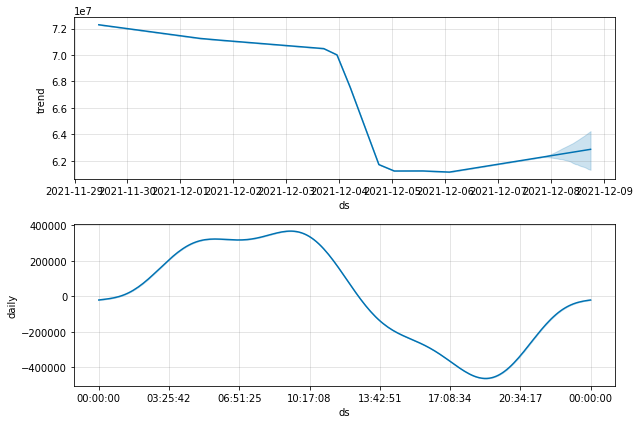

In [11]:
fig2 = model.plot_components(forecast)

In [12]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

63623000.0

In [13]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

62983513.52503361

In [14]:
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  63623000.0
종가의 가격:  62983513.52503361


In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-29 11:00:00,7.228306e+07,7.155836e+07,7.357086e+07,7.228306e+07,7.228306e+07,264841.277072,264841.277072,264841.277072,264841.277072,264841.277072,264841.277072,0.0,0.0,0.0,7.254790e+07
1,2021-11-29 12:00:00,7.226043e+07,7.138766e+07,7.338055e+07,7.226043e+07,7.226043e+07,111176.586649,111176.586649,111176.586649,111176.586649,111176.586649,111176.586649,0.0,0.0,0.0,7.237161e+07
2,2021-11-29 13:00:00,7.223780e+07,7.113285e+07,7.320761e+07,7.223780e+07,7.223780e+07,-49623.279290,-49623.279290,-49623.279290,-49623.279290,-49623.279290,-49623.279290,0.0,0.0,0.0,7.218818e+07
3,2021-11-29 14:00:00,7.221518e+07,7.104552e+07,7.302553e+07,7.221518e+07,7.221518e+07,-164788.068076,-164788.068076,-164788.068076,-164788.068076,-164788.068076,-164788.068076,0.0,0.0,0.0,7.205039e+07
4,2021-11-29 15:00:00,7.219255e+07,7.098742e+07,7.293100e+07,7.219255e+07,7.219255e+07,-229730.639137,-229730.639137,-229730.639137,-229730.639137,-229730.639137,-229730.639137,0.0,0.0,0.0,7.196282e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-12-08 14:00:00,6.275350e+07,6.108033e+07,6.399305e+07,6.157665e+07,6.376959e+07,-164788.068074,-164788.068074,-164788.068074,-164788.068074,-164788.068074,-164788.068074,0.0,0.0,0.0,6.258871e+07
220,2021-12-08 15:00:00,6.278040e+07,6.107891e+07,6.404778e+07,6.153332e+07,6.387303e+07,-229730.639139,-229730.639139,-229730.639139,-229730.639139,-229730.639139,-229730.639139,0.0,0.0,0.0,6.255067e+07
221,2021-12-08 16:00:00,6.280731e+07,6.087700e+07,6.411683e+07,6.145939e+07,6.399795e+07,-282370.925839,-282370.925839,-282370.925839,-282370.925839,-282370.925839,-282370.925839,0.0,0.0,0.0,6.252494e+07
222,2021-12-08 17:00:00,6.283422e+07,6.081960e+07,6.409392e+07,6.136453e+07,6.411897e+07,-354983.872745,-354983.872745,-354983.872745,-354983.872745,-354983.872745,-354983.872745,0.0,0.0,0.0,6.247923e+07
